In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

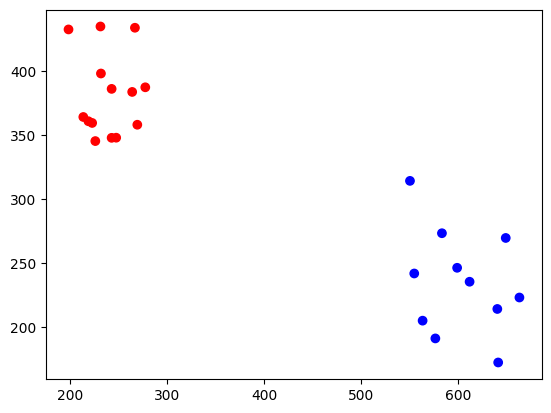

In [63]:
df=pd.read_csv("clusterpoints.csv")
x=df['x']
y=df['y']
color=['red' if c==0 else 'blue' for c in df['color']]
#print(color)
np_x=np.array(x)
np_y=np.array(y)
plt.scatter(x,y,c=color)
plt.show()

In [65]:
from math import sqrt
def euclidean_dist(p1,p2):
    x1,y1=p1
    x2,y2=p2
    return sqrt((x1-x2)**2+(y1-y2)**2)
print(euclidean_dist([0,0],[2,1]))

2.23606797749979


In [66]:
epsilon=100
minimum_points=3

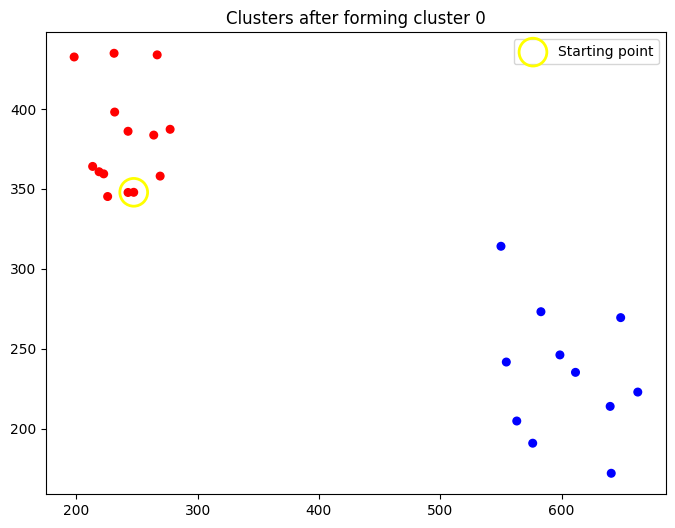

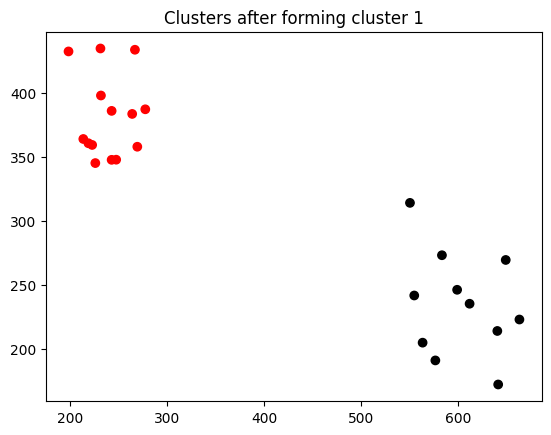

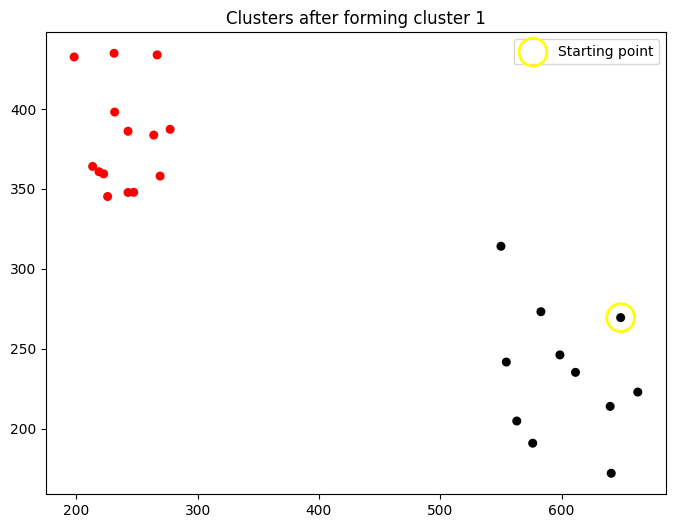

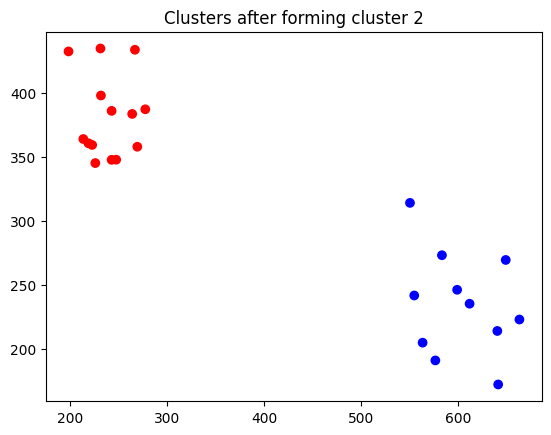

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
from random import randint
length=len(df)
cluster_id=0
labels = [-1] * length 
unvisited_index=[i for i in range(length)]
colors=['red','blue','green','purple','orange','cyan','magenta','yellow','brown','pink']

while unvisited_index:
    random_point_index=randint(0,len(unvisited_index)-1)
    starting_point_index=unvisited_index[random_point_index]
    plt.figure(figsize=(8, 6))
    plt.scatter(df['x'], df['y'], s=30)

    # Plot starting point (highlight in bigger size and different color)
    plt.scatter(df['x'][starting_point_index], df['y'][starting_point_index],
            facecolors='none', edgecolors='yellow', s=400, linewidths=2, label='Starting point')


    plt.title(f'Clusters after forming cluster {cluster_id}')
    plt.legend()
    plt.show()

    starting_point=df.iloc[starting_point_index]
    neighbors=[]
    coord=df.iloc[starting_point_index]
    for i in range(length):
        if(i==starting_point_index):
            continue
        
        distance=euclidean_dist([x[i],y[i]],[coord['x'],coord['y']])
        if(distance<=epsilon):
            neighbors.append(i)
    if(len(neighbors)<minimum_points):
        labels[starting_point_index]=-1
        #print(starting_point_index,'\n',unvisited_index)
        unvisited_index.remove(starting_point_index)
        continue
    cluster_id+=1    
    unvisited_index.remove(starting_point_index)
    queue = neighbors.copy()
    while(queue):
        neighbors_index=queue.pop(0)
        if neighbors_index in unvisited_index:
            unvisited_index.remove(neighbors_index)
            labels[neighbors_index]=cluster_id
            neighbor_point=df.iloc[neighbors_index]
            next_neighbor=[]
            coord=df.iloc[neighbors_index]
            for i in range(length):
                if(i==neighbors_index):
                    continue
                
                distance=euclidean_dist([x[i],y[i]],[coord['x'],coord['y']])
                if(distance<=epsilon):
                    next_neighbor.append(i)
            if(len(next_neighbor)>=minimum_points):
                    queue.extend(next_neighbor)
    point_colors = []
    labels[starting_point_index]=cluster_id
    for label in labels:
        if label == -1:
            point_colors.append('black')
        else:
            point_colors.append(colors[(label - 1) % len(colors)])
    plt.scatter(df['x'], df['y'], c=point_colors)
    plt.title(f'Clusters after forming cluster {cluster_id}')
    plt.show()
print(labels)




In [57]:
#print(df['color'])
true_labels=[c-1 for c in df['color']]
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Example:
ari = adjusted_rand_score(true_labels, labels)
nmi = normalized_mutual_info_score(true_labels, labels)

print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Info: {nmi}")

Adjusted Rand Index: 0.3728211749515817
Normalized Mutual Info: 0.43345097453208375
